In [1]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 
# Import Filter Warnings Libraries
import warnings
warnings.filterwarnings('ignore')

#Import Logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    filename='model.log',
                    format='%(asctime)s - %(levelname)s - %(message)s',force=True)


# Import Stats Scipy Library
import scipy.stats as stats


In [2]:
#Data Import Using Pandas Function

url= 'https://raw.githubusercontent.com/Saimehtre18/BankMarketing_ML_Model/refs/heads/main/BankTelemarketing.csv'

df =pd.read_csv(url,sep =';')

df.sample(frac = 1) #Shuffle dataset

print(df.sample(frac = 1))

       age          job   marital  education default  balance housing loan  \
32362   31       admin.   married  secondary      no      297     yes   no   
16338   30  blue-collar    single  secondary      no        0     yes   no   
2791    55  blue-collar  divorced  secondary      no     7378      no   no   
36711   41       admin.  divorced  secondary      no     1634     yes  yes   
15257   29   unemployed   married  secondary      no      -25     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
4647    39   management   married   tertiary      no      351     yes   no   
37278   34   technician   married  secondary      no      -56     yes   no   
18609   57   management   married   tertiary      no     4929     yes   no   
25035   47       admin.   married  secondary      no    12845     yes   no   
16810   26     services   married  secondary      no      199      no   no   

         contact  day month  duration  campaign  pdays  previou

In [3]:
logging.info('Dataset Uploaded Successfully ............')

In [4]:
# Checking Data Shape and Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Split the data into Numerical_Data and Categorical _Data
Numerical_Data =df.select_dtypes(exclude='object')
Categoricla_Data = df.select_dtypes(include='object')

In [6]:
#Checking Numerical_Data
Numerical_Data 

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [7]:
#Cheking Categorica_Data
Categoricla_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [8]:
# Checking Descriptive Stats: Numerical_Data and Categorical_Data
# Univarirate 

from collections import OrderedDict

stats= []

for i in Numerical_Data:
    
    numerical_stats = OrderedDict({
        'Feature':i,
        'Maximum':Numerical_Data[i].max(),
        'Minimum':Numerical_Data[i].min(),
        'Median':Numerical_Data[i].median(),
        'Mean':Numerical_Data[i].mean(),
        'Standard Deviation':Numerical_Data[i].std(),
        'Variance':Numerical_Data[i].var(),
        '25%':Numerical_Data[i].quantile(0.25),
        '75%':Numerical_Data[i].quantile(0.75),
        'Kurtosis':Numerical_Data[i].kurt(),
        'Skewness':Numerical_Data[i].skew()
    })
    
    stats.append(numerical_stats)
    
    report=pd.DataFrame(stats)
    
report

,Feature,Maximum,Minimum,Median,Mean,Standard Deviation,Variance,25%,75%,Kurtosis,Skewness
0,age,95,18,39.0,40.936210,10.618762,1.127581e+02,33.0,48.0,0.319570,0.684818
1,balance,102127,-8019,448.0,1362.272058,3044.765829,9.270599e+06,72.0,1428.0,140.751547,8.360308
2,day,31,1,16.0,15.806419,8.322476,6.926361e+01,8.0,21.0,-1.059897,0.093079
3,duration,4918,0,180.0,258.163080,257.527812,6.632057e+04,103.0,319.0,18.153915,3.144318
4,campaign,63,1,2.0,2.763841,3.098021,9.597733e+00,1.0,3.0,39.249651,4.898650
5,pdays,871,-1,-1.0,40.197828,100.128746,1.002577e+04,-1.0,-1.0,6.935195,2.615715
6,previous,275,0,0.0,0.580323,2.303441,5.305841e+00,0.0,0.0,4506.860660,41.846454


In [9]:
logging.info('The Above dataset is Non Normal distributed dataset')

In [10]:
#Checking Categoriccal Dataset Stats
for i in Categoricla_Data:
    print(Categoricla_Data[i].value_counts())
    print('*'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
****************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
****************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
****************************************
default
no     44396
yes      815
Name: count, dtype: int64
****************************************
housing
yes    25130
no     20081
Name: count, dtype: int64
****************************************
loan
no     37967
yes     7244
Name: count, dtype: int64
****************************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

As The Categorical columns not showing any specific order so label Encoding Technique is Recommended

The Numerical columns show Non Numerical Distrubution ,Hence Tree Based Algorithms are Suggested

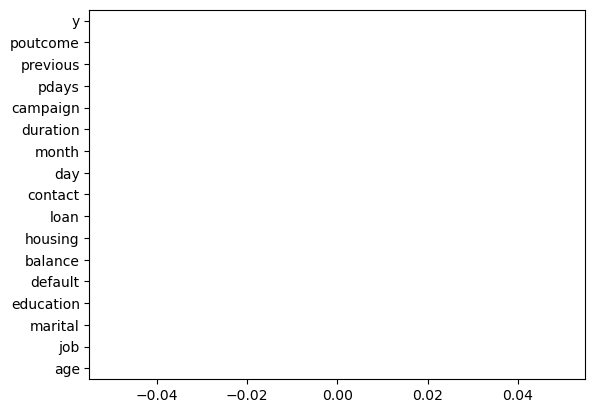

In [11]:
#Checking missing info if any using Graphical Method

df.isnull().sum().plot(kind='barh')
plt.show()

In [12]:
#checking Output i.e Target Column for Data Distribution
df['y'].value_counts()


y
no     39922
yes     5289
Name: count, dtype: int64

In [13]:
#Encoding Target Column 
# No: 0 and yes: 1
df['y']=df['y'].replace({'no':0,'yes':1})

In [14]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [15]:
#Encoding Default Column
 
df['default']=df['default'].replace({'no':0,'yes':1})

In [16]:
df.default.value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [17]:
df.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [18]:
#Encoding Hosing Column

df['housing']=df['housing'].replace({'no':0,'yes':1})

In [19]:
#Encoding Loan Column

df['loan']=df['loan'].replace({'no':0,'yes':1})

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [21]:
# USING LABELENCODING TECHNIQUE

from sklearn.preprocessing import LabelEncoder

df['job']=LabelEncoder().fit_transform(df['job'])

df['marital']=LabelEncoder().fit_transform(df['marital'])

df['education']=LabelEncoder().fit_transform(df['education'])

df['contact']=LabelEncoder().fit_transform(df['contact'])

df['poutcome']=LabelEncoder().fit_transform(df['poutcome'])

df['month']=LabelEncoder().fit_transform(df['month'])


In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [23]:
#Alternative Method
 
# le=LabelEncoder()
# for i in Categoricla_DataFrame:
#     df[i]=le.fit_transform(df[i])

In [24]:
#The Target Column shows Imbalance target

df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

Q) WHAT IS DATA LEAKAGE ? AND HOW TO PREVENT DATA LEAKAGE ?

In [25]:
# Balancing The Target Column Using Smote technique

#Step 1: Divide Dataset into X and y
# X : Independent column and y: Target column


X = df.drop(columns='y')

y=df['y']

#STEP 2: Split the Dataset into Train and Test
#100%  -----> 70 % Data is used for Training [seen data] and 30% Data [unseen data] is used for Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#Step 3: Normalization/ Scaling Technique
#Standard SCaler---->When Dataset is normally distributed
#Minmax SCaler------>When Dataset having Minor Outliers
#Robust SCaler------>When Dataset is Non Normal Distributed and having lots of outliers

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train =scaler.fit_transform(X_train) 

X_test = scaler.transform(X_test)  # Transform the test set

#Step 4: Using Smote Technique to Balance Target Column
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [26]:
# Step 5 : After Balancing the Target Column for Binary classification Model use Logistic Regression
'''
NOTE:
1.TP -->TRUE POSITIVE
2.TN -->TRUE NEGATIVE
3.FP -->FALSE POSITIVE
4.FN --> FALSE NEGATIVE

Accuracy = (TP+ TN) /(TP+ TN + FP + FN)

PRECISION = (TP)/(TP + FP) ---->PPV

RECALL = (TP)/(TP + FP) ----> Sensitivity/ TPR

F1 Score = 2 * ((Precision * Recall) / (Precision + Recall))

'''
# for any kind of classification we is Logistic regression


#Import Model Preprocessing Library form sklearn 
from sklearn.linear_model import LogisticRegression
#Implement Logistic Regression to our Binary classification Model
LR=LogisticRegression()
#Fit the Model on Training Dataset
LR.fit(X_train,y_train)

#Predict the value Based on Test Dataset
y_pred=LR.predict(X_test)

#STEP 6 : Use Metrics to Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR 

0.8124447065762312

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     12030
           1       0.35      0.80      0.49      1534

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.90      0.81      0.84     13564



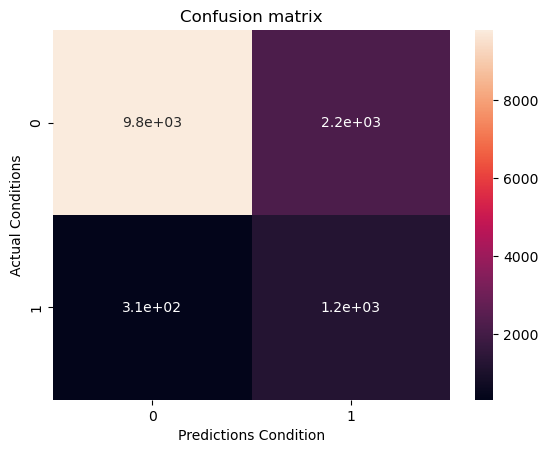

In [30]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predictions Condition")
plt.ylabel("Actual Conditions")
plt.show()

### **RANDOM FOREST CLASSIFIER**

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier()

RF.fit(X_train,y_train)

y_predict_RF= RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF

0.8950162194043055

In [33]:
print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12030
           1       0.53      0.64      0.58      1534

    accuracy                           0.90     13564
   macro avg       0.74      0.79      0.76     13564
weighted avg       0.91      0.90      0.90     13564



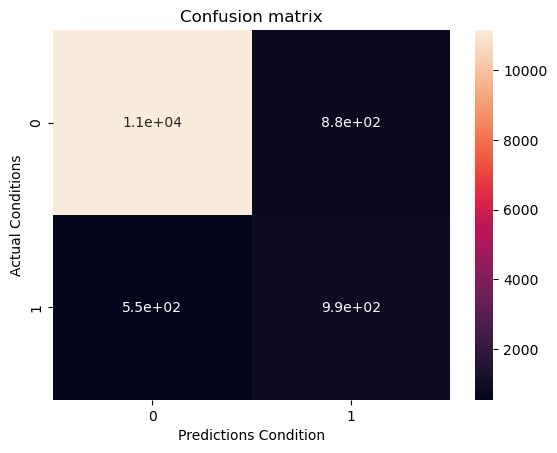

In [34]:
#Confusion Matrix for Random Forest Classification Model

sns.heatmap(confusion_matrix(y_test,y_predict_RF),annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predictions Condition")
plt.ylabel("Actual Conditions")
plt.show()